## Homework 1

Brad Kenstler

This is due on Thurs, 6/1

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

In [16]:
def p1(x): return x**9 - 18*x**8 + 144*x**7 - 672*x**6
+ 2016*x**5-4032*x**4 + 5376*x**3 - 4608*x**2 + 2304*x - 512

In [15]:
def p2(x): return (x-2)**9

In [3]:
import numpy as np

In [5]:
%matplotlib inline

In [6]:
r = np.linspace(1.920, 2.080, 161)

In [8]:
from matplotlib import pyplot

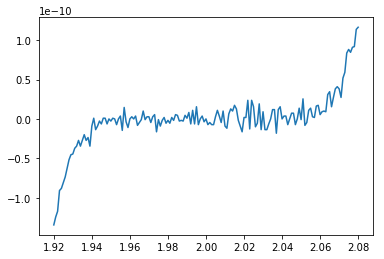

In [24]:
pyplot.plot(r, [p1(x) for x in r])

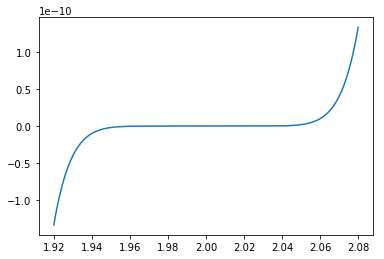

In [20]:
pyplot.plot(r, [p2(x) for x in r])


The first function has alot of noise. This makes sense due to the inexact nature of floating point arithmetic. Specifically, the long form representation of the polynomial has about 45 exponentiations. If we compare this to the 9 exponentiations of the short representation, it makes sense that the long form will introduce a large amount of noise due to the difference between the true value and it's floating point representation being exponentiated 45 times. Meanwhile, this difference is negligible with only 9 exponentiations.


2\. How many different double-precision numbers are there?  Express your answer using powers of 2

Double precision numbers are 64 bits. Since each bit is binary, there are $2^{64}$ different numbers.

3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?

A main memory reference lookup takes 100 times longer than an L1 cache reference.

A disk seek takes 30,000 times longer than a main memory reference.

4\. From the Halide Video, what are 4 ways to traverse a 2d array?

* Serial y, Serial x (Scanline Order): This is essentially a nested-loop traversal, where we traverse each y value and traverse each x within it.
* Serial x, Serial y (Column major traversal): This is the same as before, only the outer loop is the x values and the inner is the y
* Serial y, Vectorize x by 4: Same as Serial y, Serial x, only instead of traversing the x values by a single value at a time, we vectorize and traverse 4 at a time. We could also parralelize each scan line vector across y.
* Tiling: We traverse tiles of x and y (such as 4x4), move on to the next tile in the x direction when complete, traverse until finished

5\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

  a. <img src="images/Halide1.gif" alt="Halide" style="width: 70%"/>
  
  b. <img src="images/Halide2.gif" alt="Halide" style="width: 70%"/>
  
  c. <img src="images/Halide3.gif" alt="Halide" style="width: 70%"/>

Animation A: 
* Benefits: There are no reduntant computations, the "All at once, ahead of time Approach"
* Cons: Since the entire x-blur is computed prior to computing the y blur, we are saving this buffer to memory which slows us down significantly.

Animation B:
* Benefits: The output y-blur is being calculated as we calculate the necessary x-blur: This means we can speed up computation by reading the x-blur data from a local cache and dumping it when we're done.
* Cons: There are overlaps of x-blur for calculating different y-blur, and therefore by dumping each x-blur after calculating y-blur we have to make redundant calculations of the same x-blur.

Animation C:
* Benefits: We've eliminated the redundant calculation by saving some of the necessay x-blur for future y-blur computations. 
* Cons: In using previous x-blur, we've prevented ourselves from parallelizing (e.g. b/c you can't calculate row 9 unless rows 8 and 7 are done)

6\. Prove that if $A = Q B Q^T$ for some orthnogonal matrix $Q$, the $A$ and $B$ have the same singular values.

PROOF:

Let $A=QBQ^{T}$ for some orthogonal matrix $Q$.

Then $A=QBQ^{T}=U\Sigma V^{T}$ by SVD, where $U$ and $V^{T}$ are orthogonal.

Recall that by the defition of an orthogonal matrix, $QQ^{T}=I$.

Then $Q^{T}QBQ^{T}Q = B = Q^{T}U\Sigma V^{T}Q$. 

The product of two orthogonal matrices is itself orthogonal, and therefore $B=(Q^{T}U)\Sigma (V^{T}Q)=U^{\prime}\Sigma (V^{\prime})^{T}$, where $U^{\prime}$ and $(V^{\prime})^{T}$ are both orthogonal. Then this is simply the SVD for $B$.

Therefore, both $A$ and $B$ share the same singular value matrix $\Sigma$ and as a consequence, have the same singular values.

$QED$

7\. What is the *stochastic* part of *stochastic gradient descent*?

The stochastic part of stochastic gradient descent refers to the stochastic approximation of the loss function surface which we seek to minimize.

Regular gradient descent updates parameters after evaluating the gradient on the loss function surface defined over all data observations (this is the true loss function surface).

By updating parameters on randomly selected single observations, or more often randomly selected subsets, we calculate the gradient on a random approximation of the true loss function surface. 